# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


### Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.


In [17]:
import random

mean = 2
standard_deviation = 0.125
data_points = [random.gauss(mean, standard_deviation) for _ in range(5000)]

  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

In [26]:
import numpy as np

hist, bin_edges = np.histogram(data_points, bins=10)

print("numpy.histogram returns the counts of data points that fall into each bin:\n", hist, 
      "\nand edges of the bins:\n", bin_edges, "\n")

print("The list of data points is shorter -", len(hist), 
      "values, while the edges of the bins have", len(bin_edges), "values.")

numpy.histogram returns the counts of data points that fall into each bin:
 [  24  124  380  979 1423 1224  590  215   38    3] 
and edges of the bins:
 [1.5774588  1.66769669 1.75793458 1.84817247 1.93841036 2.02864825
 2.11888614 2.20912403 2.29936192 2.38959981 2.4798377 ] 

The list of data points is shorter - 10 values, while the edges of the bins have 11 values.


  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.


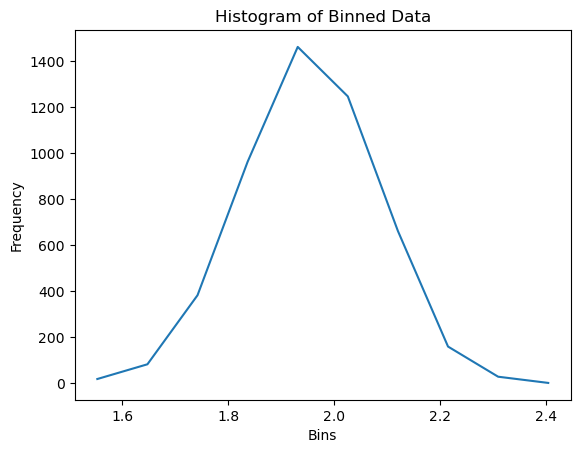

In [11]:
import matplotlib.pyplot as plt

# Different lengths are dealt with by excluding the last element using [:-1] below.
# This is necessary because the hist array contains the counts of data points within each bin, 
# and the number of elements in the hist array should match the number of bins to show the graph.
plt.plot(bin_edges[:-1], hist)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Binned Data')
plt.show()

### Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. 

       * Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  

In [27]:
random_numbers = np.random.poisson(lam=10, size=5000)
max_value = np.max(random_numbers)
min_value = np.min(random_numbers)

print("Maximum value:", max_value)
print("Minimum value:", min_value)


Maximum value: 22
Minimum value: 1


* Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 

    * Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). 

    * Use the vector by setting `numpy.histogram`'s `bins` parameter as `bins = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  

In [37]:
v = np.arange(random_numbers.min(), random_numbers.max()) # TODO: correct the min-max and explain

hist, bin_edges = np.histogram(random_numbers, bins=v)

print("Sum over bin counts:", np.sum(hist))


Sum over bin counts: 4996


* Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution. 


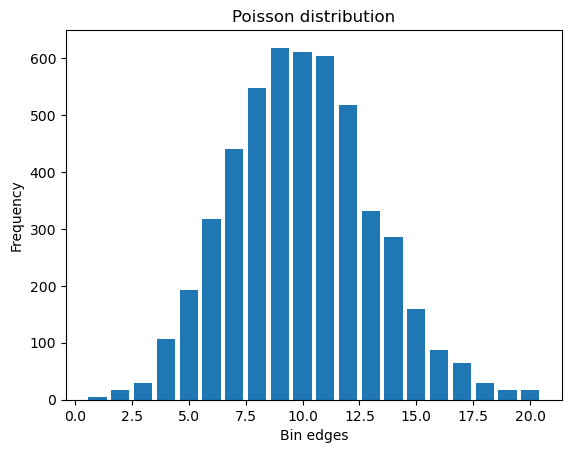

In [51]:
plt.bar(bin_edges[:-1], hist)

# Set labels and title
plt.xlabel('Bin edges')
plt.ylabel('Frequency')
plt.title('Poisson distribution')

# Show the plot
plt.show()

### Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
  
    * First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 

    * **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  

In [44]:
k = 10
N = 5000
p = k / (N - 1) 

* Now, use `networkx` to create the graph and extract the degree distribution.

In [49]:
import networkx as nx

G = nx.erdos_renyi_graph(N, p)
degree_count = nx.degree_histogram(G)

* Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

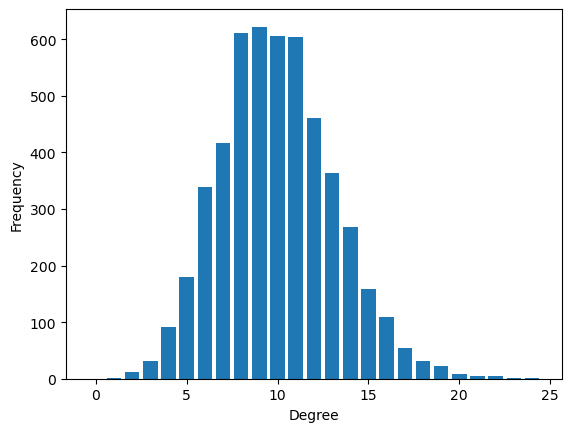

In [50]:
   plt.bar(range(len(degree_count)), degree_count)
   plt.xlabel("Degree")
   plt.ylabel("Frequency")
   plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


In [3]:
seed = 1234
N = 500
k_avg = 4
p_list = [0, 0.1, 1]
graphs = [None for _ in range(len(p_list))]
d_avg = [None for _ in range(len(p_list))]

import networkx as nx

for i in range(len(p_list)):
    graphs[i] = nx.watts_strogatz_graph(n=N,k=k_avg,p=p_list[i],seed=seed)
    d_avg[i] = nx.average_shortest_path_length(graphs[i])

from math import log
d_avg_theory = log(N)/log(k_avg)
print(f"Practical <d> vs theoretical <d>: {d_avg[2]} and {d_avg_theory}")

Practical <d> vs theoretical <d>: 4.763647294589179 and 4.4828921423310435


> **Solution**: When $p = 1$ the average shortest path is the shortest and is the closest to reproducing the $\langle d \rangle$'s theoritical value in random networks, thereby presenting the *small world* property. 

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [4]:
from numpy import std
seed = 1234
n_networks = 50
N = 500
k_avg = 4
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
d_avg = [None for _ in range(len(p_list))]
d_avg_avg = [None for _ in range(len(p_list))]
d_avg_std = [None for _ in range(len(p_list))]


import networkx as nx

for i in range(len(p_list)):
    d_avg[i] = [-1 for _ in range(n_networks)]
    for j in range(n_networks):
        G = nx.watts_strogatz_graph(n=N,k=k_avg,p=p_list[i],seed=seed+j)
        d_avg[i][j] = nx.average_shortest_path_length(G)
    d_avg_avg[i] = sum(d_avg[i])/n_networks
    d_avg_std[i] = std(d_avg[i])

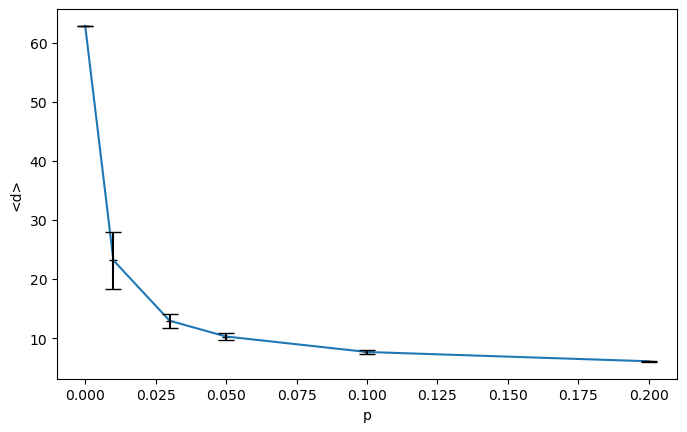

In [5]:
import matplotlib.pyplot as plt
from math import log
fig, ax1 = plt.subplots(1)
fig.set_figwidth(8)

ax1.plot(p_list,  d_avg_avg)
ax1.set_xlabel("p")
ax1.set_ylabel("<d>")
for i in range(len(p_list)):
    ax1.errorbar(p_list[i], d_avg_avg[i], yerr=d_avg_std[i], barsabove = True, fmt='k_', capsize=6)

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).

In [6]:
seed = 1234
def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    
    for i, k in enumerate(degrees):
        halfedges += [i for _ in range(k)]
        

    # STEP ONE ENDS HERE
    print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print(halfedges)
    
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    import random as rd
    rd.Random(seed).shuffle(halfedges)
    # STEP TWO ENDS HERE    
    
    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
    # STEP THREE GOES HERE..
    edgelist = [(halfedges[l*2],halfedges[l*2+1]) for l in range(int(len(halfedges)/2))]
    # STEP THREE ENDS HERE    

    return edgelist #Return list of tuples indicating edges

In [ ]:
G = configuration_model(list(BA_d.values()))
print([(u,v) for (u,v,_) in G.edges])
d = dict(G.degree)

plt.figure(3,figsize=(4,4))
nx.draw(G, node_size=[v * 5 for v in d.values()])

* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

* What should the sum of node degrees be if all nodes had degrees as described in the exercise?

* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.